Практична робота №5

Баш Анастасія
МІТ-31

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

Завдання №1 Встановлення TensorFlow

Завдання №2 Ознайомлення з TensorFlow

Завдання №3 Побудова моделі для регресії:

1. Використайте згенерований у лабораторній роботі 2 набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.

In [22]:
# Завантаження та огляд даних
data = pd.read_csv('regression_dataset.csv')
print(data.head())

# Підготовка даних
X = data.drop(columns=['Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0   2.056544   0.606851   0.482688  -1.130888   0.420094  70.771314
1  -0.799192  -0.645964  -0.182896  -0.482744   1.374876 -51.604236
2   1.076007  -0.796026  -0.751969   0.021312  -0.319054 -37.000448
3  -0.103255  -0.828497   1.489863  -1.643189  -1.600904 -83.535099
4  -2.063403   0.503252  -0.645572  -0.317350  -1.661083 -83.400394


2. Створіть та скомпілюйте модель нейронної мережі для регресії з використанням TensorFlow.

In [24]:
# Побудова та компіляція моделі
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Один вихід для регресії
])

model.compile(optimizer='adam', loss='mean_squared_error')

3. Виберіть функцію втрати та оптимізатор для моделі та навчіть її на підготовленому наборі даних.

In [25]:
# Навчання моделі
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)

4. Оцініть результати навчання та відобразіть їх графічно.

Mean Squared Error on Training Data: 120.5104751586914
Mean Squared Error on Test Data: 122.89331817626953


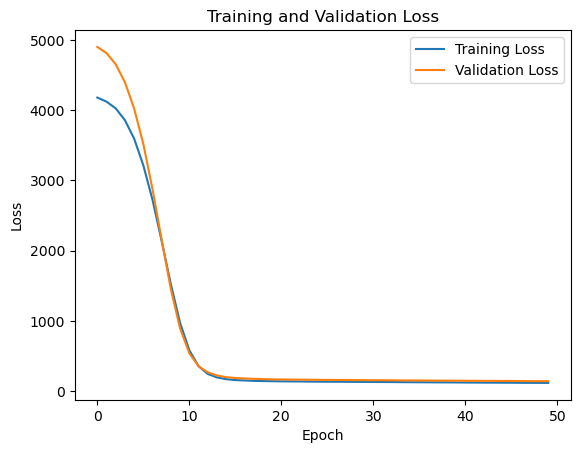

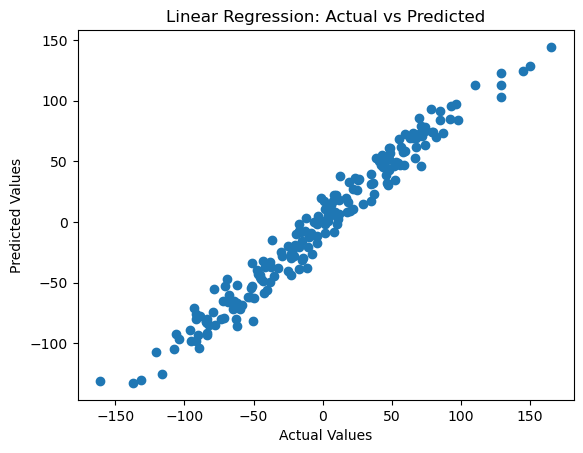

In [23]:
# Оцінка результатів та візуалізація
mse_train = model.evaluate(X_train_scaled, y_train, verbose=0)
mse_test = model.evaluate(X_test_scaled, y_test, verbose=0)


print(f'Mean Squared Error on Training Data: {mse_train}')
print(f'Mean Squared Error on Test Data: {mse_test}')

# Візуалізація результатів
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Прогнозування на тестовому наборі
y_pred = model.predict(X_test_scaled)

# Візуалізація лінійної регресії (реальні значення проти прогнозованих)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

Ми бачимо, що наша модель працює добре, так як усі точки розташовані по діагоналі в одну лінію.


Робота у практичній та лабораточній №2 у результатах мало чим відрізняються. Що та, що інша мають достатньо високу точність.
 Оцінка середньоквадратичної помилки (MSE) та середньоабсолютної помилки (MAE) свідчать про добре підгонку моделі до даних.

Завдання №4 Побудова моделі для класифікації:

1. Використайте згенерований у ллабораторній роботіаб 3 набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.

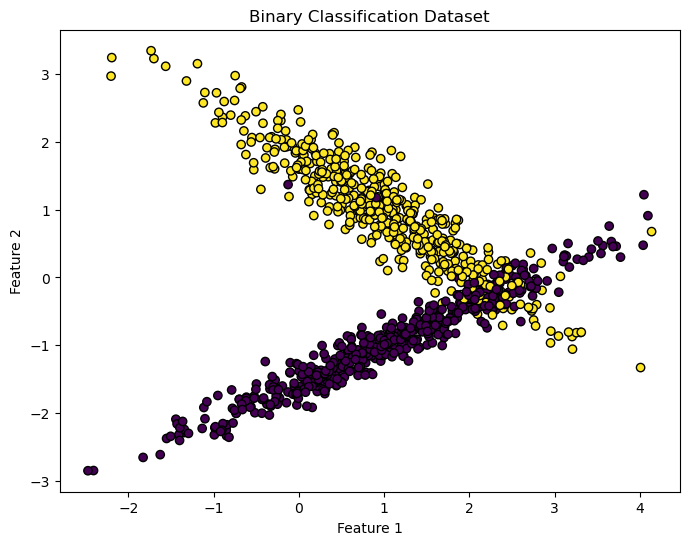

In [26]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)  # Генерація даних

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Розбиття даних на тренувальний та тестовий набори

# Візуалізація набору даних
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

2. Створіть та скомпілюйте модель нейронної мережі для класифікації з використанням TensorFlow.

In [27]:
model = Sequential([  # Створення моделі
    Dense(32, activation='relu', input_shape=(2,)),  # Перший Dense шар з 32 нейронами та активацією ReLU
    Dense(1, activation='sigmoid')  # Другий Dense шар з одним нейроном та активацією sigmoid
])


3. Виберіть функцію втрати, оптимізатор та метрики для моделі та навчіть її на підготовленому наборі даних.

In [32]:
model.compile(optimizer='adam',  # Компіляція моделі з оптимізатором Adam
              loss='binary_crossentropy',  # Використання функції втрат binary_crossentropy
              metrics=['accuracy'])  # Вимірювання точності

model.fit(X, y, epochs=10, batch_size=32)  # Навчання моделі

y_pred_non_binary = model.predict(X_test)  # Прогнозування неперетворених ймовірностей

y_pred = (y_pred_non_binary > 0.5).astype(int)  # Перетворення ймовірностей в бінарні класи

loss, accuracy = model.evaluate(X, y)


Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2121 - accuracy: 0.9020
Epoch 2/10
32/32 [==============================] - 0s 714us/step - loss: 0.2086 - accuracy: 0.9060
Epoch 3/10
32/32 [==============================] - 0s 708us/step - loss: 0.2070 - accuracy: 0.9070
Epoch 4/10
32/32 [==============================] - 0s 591us/step - loss: 0.2045 - accuracy: 0.9070
Epoch 5/10
32/32 [==============================] - 0s 674us/step - loss: 0.2034 - accuracy: 0.9060
Epoch 6/10
32/32 [==============================] - 0s 677us/step - loss: 0.2014 - accuracy: 0.9080
Epoch 7/10
32/32 [==============================] - 0s 774us/step - loss: 0.1992 - accuracy: 0.9080
Epoch 8/10
32/32 [==============================] - 0s 694us/step - loss: 0.1979 - accuracy: 0.9140
Epoch 9/10
32/32 [==============================] - 0s 736us/step - loss: 0.1962 - accuracy: 0.9120
Epoch 10/10
32/32 [==============================] - 0s 702us/step - loss: 0.1940 - accuracy: 0.9250


Loss: 0.21138601005077362, Accuracy: 0.902999997138977
Точність: 0.89
Відгук: 0.8645833333333334
F1-середнє: 0.8829787234042554
AUC-ROC: 0.8890224358974359
Матриця плутанини:
[[95  9]
 [13 83]]


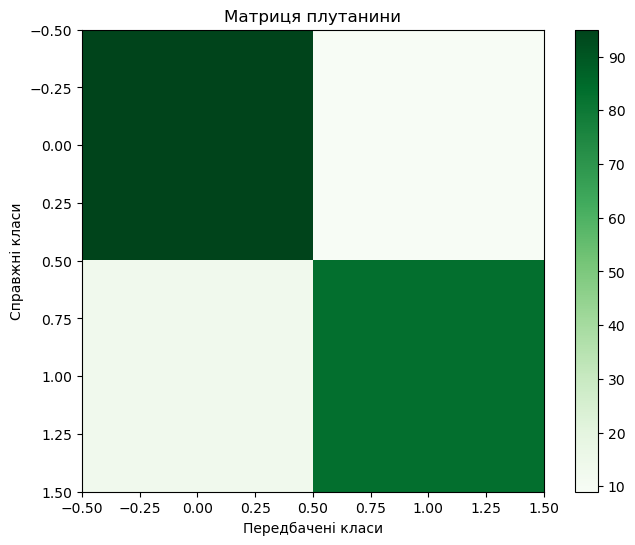

In [31]:
print(f'Loss: {loss}, Accuracy: {accuracy}')

accuracy = accuracy_score(y_test, y_pred)  # Визначення точності
recall = recall_score(y_test, y_pred)  # Визначення відгуку
f1 = f1_score(y_test, y_pred)  # Визначення F1-середнього
roc_auc = roc_auc_score(y_test, y_pred)  # Визначення AUC-ROC
confusion = confusion_matrix(y_test, y_pred)  # Визначення матриці плутанини

print(f'Точність: {accuracy}')
print(f'Відгук: {recall}')
print(f'F1-середнє: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(f'Матриця плутанини:\n{confusion}')

plt.figure(figsize=(8, 6))  # Візуалізація матриці плутанини
plt.imshow(confusion, cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.title('Матриця плутанини')
plt.ylabel('Справжні класи')
plt.xlabel('Передбачені класи')
plt.show()